In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.float="float64"

In [3]:
df=pd.read_csv("Ice_cream selling data.csv")

In [4]:
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


<AxesSubplot:>

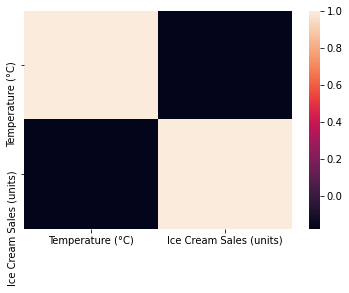

In [5]:
sns.heatmap(df.corr())

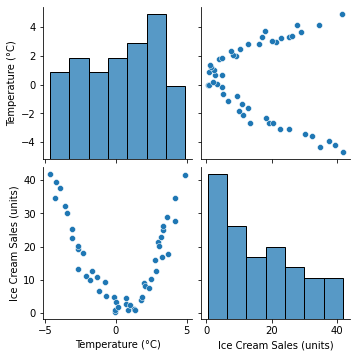

In [6]:
sns.pairplot(df)

<AxesSubplot:xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

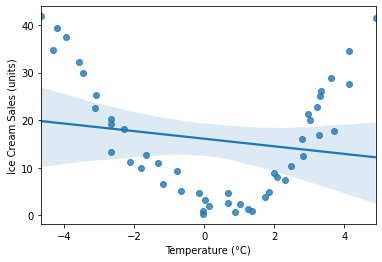

In [7]:
sns.regplot(x=df['Temperature (°C)'],y=df['Ice Cream Sales (units)'])

In [8]:
x=df[['Temperature (°C)']]
y=df[['Ice Cream Sales (units)']]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [10]:
print(r2,mse)

-0.028604108116984106 164.50722719526814


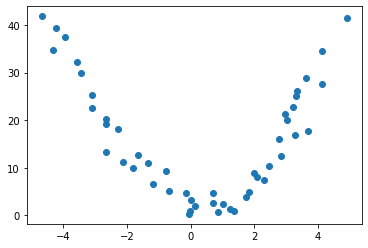

In [11]:
plt.scatter(df['Temperature (°C)'],df['Ice Cream Sales (units)'])

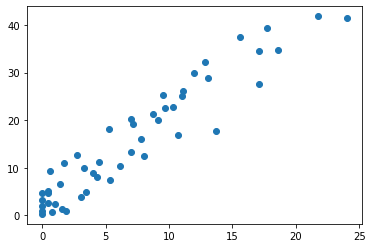

In [12]:
 plt.scatter(df['Temperature (°C)']*df['Temperature (°C)'],df['Ice Cream Sales (units)'])

In [13]:
x=df[["Temperature (°C)"]]
y=df["Ice Cream Sales (units)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
print(x_poly)

[[ 1.00000000e+00  2.95993209e+00  8.76119799e+00]
 [ 1.00000000e+00 -4.21398476e+00  1.77576676e+01]
 [ 1.00000000e+00  3.02087431e+00  9.12568162e+00]
 [ 1.00000000e+00  1.99931037e+00  3.99724195e+00]
 [ 1.00000000e+00 -2.65149803e+00  7.03044182e+00]
 [ 1.00000000e+00 -3.38952856e-02  1.14889038e-03]
 [ 1.00000000e+00  2.47194600e+00  6.11051701e+00]
 [ 1.00000000e+00  1.02418081e+00  1.04894634e+00]
 [ 1.00000000e+00 -6.73752802e-01  4.53942838e-01]
 [ 1.00000000e+00  1.85055193e+00  3.42454243e+00]
 [ 1.00000000e+00 -4.31655945e+00  1.86326855e+01]
 [ 1.00000000e+00 -2.11186969e+00  4.45999359e+00]
 [ 1.00000000e+00  2.31859124e+00  5.37586534e+00]
 [ 1.00000000e+00  3.61077848e+00  1.30377212e+01]
 [ 1.00000000e+00  8.74905029e-01  7.65458810e-01]
 [ 1.00000000e+00 -3.45571170e+00  1.19419433e+01]
 [ 1.00000000e+00 -1.81893761e+00  3.30853403e+00]
 [ 1.00000000e+00  8.60769873e-03  7.40924775e-05]
 [ 1.00000000e+00 -1.49634867e-01  2.23905933e-02]
 [ 1.00000000e+00 -7.73330043e-

In [14]:
model=LinearRegression()
model.fit(x_poly,y_train)
y_pred=model.predict(poly.fit_transform(x_test))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

11.186143275103154
0.9300570976550553


In [19]:
r2=[]
r_score=0
for i in range(1,16):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(x_train)
    model=LinearRegression()
    model.fit(x_poly,y_train)
    y_pred=model.predict(poly.fit_transform(x_test))
    r_new=r2_score(y_test,y_pred)
    r2.append(r_new)
    if(r_new>r_score):
        deg=i
        r_score=r_new
        y_4=model.predict(poly.fit_transform(np.array([[4]])))
        print(deg,r_score,y_4)

2 0.9300570976550553 [28.31718777]
3 0.9369819792577767 [28.91549142]
4 0.9456182333790882 [29.29378105]
5 0.9469555782323222 [29.91251606]
6 0.9496296635022425 [30.18722737]
